## Global Temperature Data: https://climate.nasa.gov/vital-signs/global-temperature/

In [246]:
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import math
#To plot the graph embedded in the notebook
%matplotlib inline

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

In [187]:
#uploading climate data
df=pd.read_csv('graph.csv')

In [244]:
print (df.shape)
print (df.keys)

(139, 3)


In [189]:
df.head()

,Year,No_Smoothing,Lowess
0,1880,-0.16,-0.09
1,1881,-0.08,-0.12
2,1882,-0.10,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.23


## Basic Statistical Analysis
From the basic statistical analysis of the data, I could notice that:
- Lowess data is the optimized data for No_Smoothing
- Both lowess and no_smoothing are values between 0 and 1
- The STD of No_smoothing is quite small compared to the value of std for Year, which is 40.25
- The large STD value for Year indicates that the data may need to be standardized

In [190]:
#basic statistical analysis (mean, variance, …)
df.describe()

,Year,No_Smoothing,Lowess
count,139.000000,139.000000,139.000000
mean,1949.000000,0.034892,0.035396
std,40.269923,0.343491,0.332806
min,1880.000000,-0.490000,-0.420000
25%,1914.500000,-0.210000,-0.230000
50%,1949.000000,-0.070000,-0.050000
75%,1983.500000,0.210000,0.215000
max,2018.000000,1.020000,0.960000


In [191]:
#read data into columns
year = pd.read_csv('graph.csv', usecols=[0])
#print (year)
#smoothing = df["No_Smoothing"]
smoothing = pd.read_csv('graph.csv', usecols=[1])
#print(smoothing)
#lowess = df["Lowess"]
lowess = pd.read_csv('graph.csv', usecols=[2])

In [192]:
print(year.shape)
print(smoothing.shape)
print(lowess.shape)

(139, 1)
(139, 1)
(139, 1)


## Y data choice
No_Smoothing is the raw data, while Lowess is the optimized/standardized data
I chose to stick to the No_smoothing data, because it is not optimized, so in the implementation below, I disregarded the Lowess values.

In [217]:
# created np arrays
x = np.array(year).reshape(-1,1)
y_1 = np.array(smoothing).reshape(-1,1)

print(x.shape)
print (y_1.shape)

(139, 1)
(139, 1)


In [218]:
#splitting data
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split( x, y_1, test_size=0.2, random_state=40)

In [219]:
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(111, 1)
(28, 1)
(111, 1)
(28, 1)


## Linear Regression

In [220]:
#linear regressor
lm_1=LinearRegression()
lm_1.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

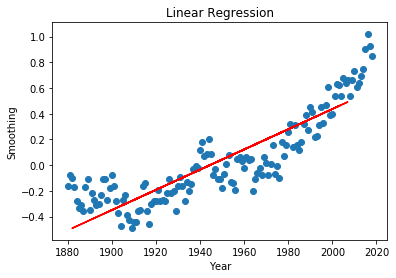

In [221]:
#errors
from sklearn.metrics import r2_score

prediction_test_1 = lm_1.predict(X_test_1)
rmse_1 =np.sqrt(mean_squared_error(Y_test_1, prediction_test_1))
r2_1 = r2_score(Y_test_1, prediction_test_1)

fig, plot_1 = plt.subplots()
plot_1.scatter(year, smoothing)
plot_1.plot(X_test_1, prediction_test_1, 'r-')

plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Linear Regression')
plt.show()

In [222]:
print("Root Mean Squared Error: {}".format(rmse_1))
print("R^2: {}".format(r2_1))
print("\n")

Root Mean Squared Error: 0.184745660492695
R^2: 0.540654412638955




## Stochastic Gradient Descent Regression using SGDRegressor
For the purpose of this implementation, the year and smoothing values have been standardized using scikit.preprocessing, fitted to the training values and then the prediction was evaluated on the test dataset.

In [223]:
# Create an SGDRegressor instance which will have methods to do our linear regression fitting by gradient descent
x = np.array(year).reshape(-1,1)
y_1 = np.array(smoothing).reshape(-1,1)

x = preprocessing.scale(x)
y_1 = preprocessing.scale(y_1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split( x, y_1, test_size=0.2, random_state=40)

sgd_reg = SGDRegressor(max_iter=1000, tol=0.00001, penalty=None, eta0=0.001, early_stopping=False)
Y_train_1 = np.array(Y_train_1)

print (Y_train_1.shape)
print ( Y_train_1.ravel())

#fitting data
sgd_reg.fit(X_train_1, Y_train_1.ravel())

(111, 1)
[ 1.76801269  0.07336065 -0.77396537  0.54085087 -0.92005607 -0.48178398
  0.36554204  1.68035828  0.48241459  0.10257879 -1.4752007  -0.42334771
  1.0959955  -0.42334771 -0.92005607  1.76801269 -1.12458304 -0.13116632
 -0.74474723 -1.53363698  0.65772342 -0.33569329 -0.30647515 -0.74474723
 -0.42334771 -0.97849234 -0.92005607  1.03755923 -0.27725701 -0.33569329
  0.30710576 -0.36491143 -1.15380117  1.27130434  1.88488525  1.21286806
 -0.5694384  -0.65709282 -1.24145559  2.5276843  -0.54022026  1.03755923
 -0.5694384   0.07336065 -0.07273004  1.73879456 -1.12458304 -0.33569329
 -0.5694384   1.91410339  0.16101507 -1.15380117  0.07336065 -0.1896026
  2.38159361  1.21286806  0.83303226 -0.89083793 -0.65709282  2.61533872
  0.16101507 -0.16038446 -1.06614676  0.80381412 -1.38754628 -0.51100212
 -0.89083793 -0.16038446 -0.42334771 -0.92005607  0.24866948  1.47583131
 -0.1896026   1.06677737  2.87830196  0.01492437 -1.44598256 -1.00771048
 -1.35832815  0.04414251  2.03097594  2.089

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=1e-05, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0.5, 1.0, 'Stochastic Gradient Descent')

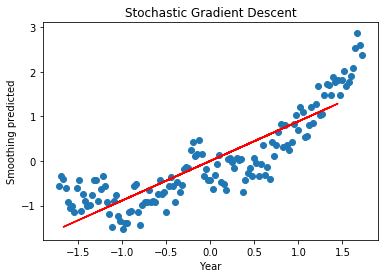

In [201]:
#prediction
pred_1 = sgd_reg.intercept_ + X_test_1.dot(sgd_reg.coef_)
pred_1 = np.array(pred_1).reshape(-1,1)

fig, plot_1 = plt.subplots()
plot_1.scatter(x, y_1)
plot_1.plot(X_test_1, pred_1, 'r-')
plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Stochastic Gradient Descent')

In [202]:
#errors
rmse_2 =np.sqrt(mean_squared_error(Y_test_1, pred_1))
r2_2 = r2_score(Y_test_1, pred_1)

print(rmse_2)
print(r2_2)

0.5234427441144271
0.5680590965565985


## Gradient Descent without Standardization
I implemented GD using the code shown in class.

The learning rate and the number of epochs needed to be adjusted signicantly in order to get a fitting of the training data.
However, the results were not so good, as the gradient is stuck in plateau.

In [248]:
#manual implementation of the Gradient Descent without standardization
#reduced the learning rate significantly
x = np.array(year).reshape(-1,1)
y_1 = np.array(smoothing).reshape(-1,1)
y_2 = np.array(lowess).reshape(-1,1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split( x, y_1, test_size=0.2, random_state=40)

# Building the model
m = 0
c = 0

##Learning rate reduced by 7 orders of magnitude
L = 0.0000000001  # The learning Rate
##Number of epochs increased by 1 order of magnitude
epochs = 10000  # The number of iterations to perform gradient descent

X = X_train_1
Y = Y_train_1
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
    
print (m, c)

[2.25299758e-05] [-1.36816819e-09]


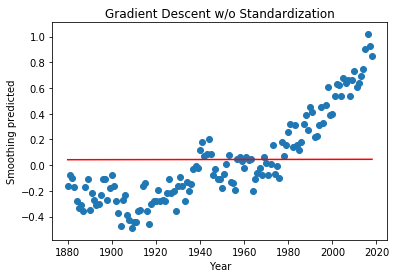

In [252]:
# Making predictions
Y_pred = m*X + c

plt.scatter(year, smoothing)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Gradient Descent w/o Standardization')
plt.show()

In [228]:
#errors
rmse_3 =np.sqrt(mean_squared_error(Y_train_1, Y_pred))
r2_3 = r2_score(Y_train_1, Y_pred)

print(rmse_3)
print(r2_3)

0.3569063255617716
0.004118765421738391


## Optimization 1
I tried to modify the values of m and c in order to obtain better results.

In [254]:
#Optimization 1
# Building the model

m = -0.05
#the more negative the c, the closer to (0, 0)
c = -8

L = 0.0000000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent


X = X_train_1
Y = Y_train_1
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
        Y_pred = m*X + c  # The current predicted value of Y
        #print (Y_pred)
        D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
    
print (m, c)

[0.004098] [-7.99997226]


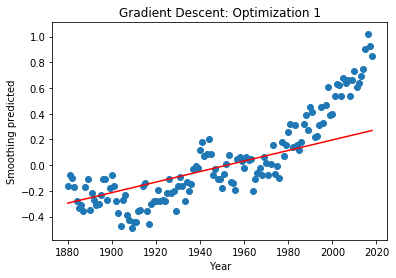

In [255]:
# Making predictions
Y_pred = m*X + c

plt.scatter(year, smoothing)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Gradient Descent: Optimization 1')
plt.show()

In [256]:
#errors
rmse_4 =np.sqrt(mean_squared_error(Y_train_1, Y_pred))
r2_4 = r2_score(Y_train_1, Y_pred)

print(rmse_4)
print(r2_4)

0.23200071968440636
0.579198070109733


## Optimization 2
Introduced two new parameters that will affect the learning late L by dividing it to the square of the sum of the learning rate L multiplied by the gradient.

In [257]:
#Optimization 2
s_c = 0
s_m = 0

L = 0.0000000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent


X = X_train_1
Y = Y_train_1
n = float(len(X)) # Number of elements in X


for i in range(epochs): 
        Y_pred_2 = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred_2))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred_2)  # Derivative wrt c
        s_c = s_c + (L * D_c)*(L * D_c)
        s_m = s_m + (L * D_m)*(L * D_m)
        m = m - (L/math.sqrt(s_m)) * D_m  # Update m
        c = c - (L/math.sqrt(s_c)) * D_c  # Update c
    
print (m, c)

[0.00413302] [-8.01570504]


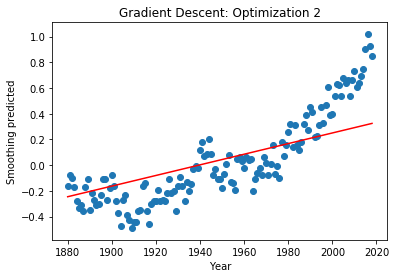

In [258]:
# Making predictions
Y_pred_2 = m*X + c

plt.scatter(year, smoothing)
plt.plot([min(X), max(X)], [min(Y_pred_2), max(Y_pred_2)], color='red') # predicted
plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Gradient Descent: Optimization 2')
plt.show()

In [259]:
#errors
rmse_5 =np.sqrt(mean_squared_error(Y_train_1, Y_pred_2))
r2_5 = r2_score(Y_train_1, Y_pred_2)

print(rmse_5)
print(r2_5)

0.2257598936527592
0.6015327410060459


## Optimization 3
Improved Optimization 2 by modifying the s_c and s_m parameters by a factor of 2.

In [260]:
#trial 3
# Building the model
L = 0.0000000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

X = X_train_1
Y = Y_train_1
n = float(len(X)) # Number of elements in X

s_c = 0
s_m = 0

for i in range(epochs): 
        Y_pred_3 = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred_3))  # Derivative wrt m
        D_c = (-2/n) * sum(Y - Y_pred_3)  # Derivative wrt c
        s_c = s_c + 2*(L * D_c)*(L * D_c)
        s_m = s_m + 2*(L * D_m)*(L * D_m)
        m = m - (L/math.sqrt(s_m)) * D_m  # Update m
        c = c - (L/math.sqrt(s_c)) * D_c  # Update c

print (m, c)

[0.00486436] [-9.44187356]


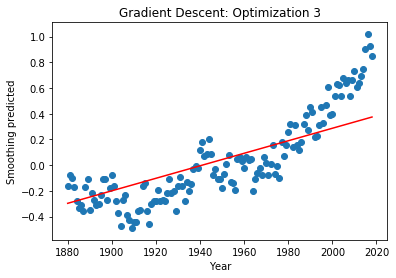

In [261]:
# Making predictions
Y_pred_3 = m*X + c

plt.scatter(year, smoothing)
plt.plot([min(X), max(X)], [min(Y_pred_3), max(Y_pred_3)], color='red') # predicted
plt.xlabel('Year')
plt.ylabel('Smoothing')
plt.title('Gradient Descent: Optimization 3')
plt.show()

In [262]:
#rmse = Y_pred_value, Y_true_value
rmse_6 =np.sqrt(mean_squared_error(Y_train_1, Y_pred_3))
r2_6 = r2_score(Y_train_1, Y_pred_3)

print(rmse_6)
print(r2_6)

#Linear Regression
#Root Mean Squared Error: 0.184745660492695
#R^2: 0.540654412638955


0.20751888260253915
0.6633223406379986
